# Suicide rate data analysis in the world 

This is the final course project for Data Analysis with Python:ZerotoPandas.In this notebook I will be trying to analyse the WHO suicide statistics CSV.  



Suicide is a leading cause of death. Suicide is death caused by injuring oneself with the intent to die. A suicide attempt is when someone harms themselves with any intent to end their life, but they do not die as a result of their actions. 1. Many factors can increase the risk for suicide or protect against it.



## Downloading the Dataset

Let's download our dataset from kaggle .

In [1]:
#Let's import all the packages first

!pip install jovian opendatasets --upgrade --quiet
import numpy as np
import urllib.request
import os 
import pandas as pd
!pip install matplotlib seaborn --upgrade --quiet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# downloading the dataset

dataset_url = "https://www.kaggle.com/datasets/szamil/who-suicide-statistics/download"

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeetsingh72
Your Kaggle Key: ········


100%|██████████| 304k/304k [00:00<00:00, 81.4MB/s]

The dataset has been downloaded and extracted.

In [4]:
#verifying if the dataset was downloaded
data_dir = "who-suicide-statistics"

In [5]:
import os
os.listdir(data_dir)

['who_suicide_statistics.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "suicide-rate-data-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'

## Data Preparation and Cleaning

Let's clean and parse the data as we go through our dataset



In [10]:
import pandas as pd

In [11]:
suicide_raw_df = pd.read_csv(data_dir+"/who_suicide_statistics.csv")

In [12]:
suicide_raw_df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [13]:
suicide_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [14]:
#displays number of rows and columns as well as column names

print("(Rows, columns): " + str(suicide_raw_df.shape))
suicide_raw_df.columns

(Rows, columns): (43776, 6)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [15]:
#let's count the number of rows that have null values

suicide_raw_df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [16]:
#Let's fill the null columns with zeroes

suicide_raw_df = suicide_raw_df.fillna(0)

In [17]:
suicide_raw_df.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [18]:
suicide_raw_df = suicide_raw_df.fillna(0)

In [19]:
population_col = suicide_raw_df['population']
population_col.replace(to_replace = 0, value = population_col.mean(), inplace=True)

In [20]:
suicides_no_col = suicide_raw_df['suicides_no']
suicides_no_col.replace(to_replace = 0, value = suicides_no_col.mean(), inplace=True)

In [21]:
suicide_raw_df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,183.352865,2.779000e+05
1,Albania,1985,female,25-34 years,183.352865,2.468000e+05
2,Albania,1985,female,35-54 years,183.352865,2.675000e+05
3,Albania,1985,female,5-14 years,183.352865,2.983000e+05
4,Albania,1985,female,55-74 years,183.352865,1.387000e+05
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.000000,1.456536e+06
43772,Zimbabwe,1990,male,35-54 years,132.000000,1.456536e+06
43773,Zimbabwe,1990,male,5-14 years,6.000000,1.456536e+06
43774,Zimbabwe,1990,male,55-74 years,74.000000,1.456536e+06


In [22]:
#let's find out the different age groups mentioned in the dataframe

suicide_raw_df.age.unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [23]:
#list the different countries 

suicide_raw_df.country.unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [24]:
suicide_raw_df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,183.352865,2.779000e+05
1,Albania,1985,female,25-34 years,183.352865,2.468000e+05
2,Albania,1985,female,35-54 years,183.352865,2.675000e+05
3,Albania,1985,female,5-14 years,183.352865,2.983000e+05
4,Albania,1985,female,55-74 years,183.352865,1.387000e+05
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.000000,1.456536e+06
43772,Zimbabwe,1990,male,35-54 years,132.000000,1.456536e+06
43773,Zimbabwe,1990,male,5-14 years,6.000000,1.456536e+06
43774,Zimbabwe,1990,male,55-74 years,74.000000,1.456536e+06


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'

## Exploratory Analysis and Visualization

Now we will analyse our dataset using graphs and try to predict the trend of our dataset



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

***Year Wise Analysis ***

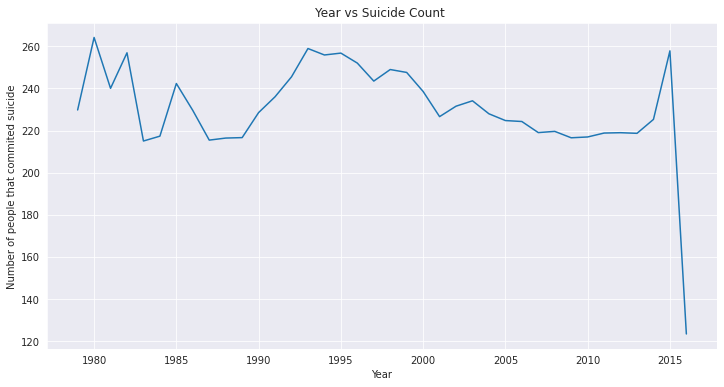

In [28]:
suicide_raw_df.groupby('year')['suicides_no'].mean().plot()
plt.title('Year vs Suicide Count ')
plt.xlabel('Year')
plt.ylabel('Number of people that commited suicide');

We can see a sharp decline in suicides in 1985, this can be due to the reason of raised awareness  of suicide and mental wellbeing during that period in time.

***Country Wise Analysis ***

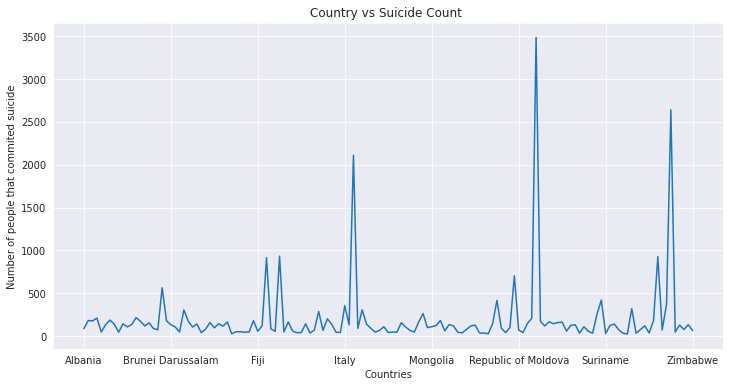

In [29]:
suicide_raw_df.groupby('country')['suicides_no'].mean().plot()
plt.title('Country vs Suicide Count ')
plt.xlabel('Countries')
plt.ylabel('Number of people that commited suicide');

We can see that Albania has the lowest suicide count in the graph, this can be due to the reason of it's low population. It only has a population of 3 million .

**Relationship of age groups and suicides**.

Right now, we have a range of ages that are seperated by a hyphen , we have to calculate it in terms of numerical data.We must take away the hyphen & create a function that classifies each category into a certain number.

In [30]:
#take first 2 characters from age column
suicide_raw_df['Age_num'] = suicide_raw_df['age'].str[:2]

#remove the dashes
suicide_raw_df['Age_num'] = suicide_raw_df['Age_num'].map(lambda x: x.replace('-',''))

#convert it to type int 
suicide_raw_df['Age_num'] = suicide_raw_df['Age_num'].astype(int)

suicide_raw_df['Age_num'].tail


<bound method NDFrame.tail of 0        15
1        25
2        35
3         5
4        55
         ..
43771    25
43772    35
43773     5
43774    55
43775    75
Name: Age_num, Length: 43776, dtype: int64>

In [31]:
 #creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Column to the AgeGroup Method
suicide_raw_df['AgeCategory'] = suicide_raw_df['Age_num'].map(lambda x: AgeGroup(x))
# convert it back to type String
suicide_raw_df['AgeCategory'] = suicide_raw_df['AgeCategory'].astype(str)
suicide_raw_df['AgeCategory'].tail()

43771                Adults
43772    Middle_Aged_Adults
43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [32]:
#let's check out the new column we just created

suicide_raw_df.Age_num

0        15
1        25
2        35
3         5
4        55
         ..
43771    25
43772    35
43773     5
43774    55
43775    75
Name: Age_num, Length: 43776, dtype: int64

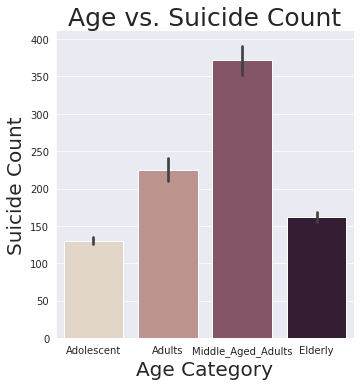

In [33]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=suicide_raw_df);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20);

As we can see that middle aged people are more inclined to commiting suicide. The people aged between 30 to 60 have the highest suicide count . Suicide count of adolescents and the elderly are almost half compared to it.

**Number of suicides and gender** 

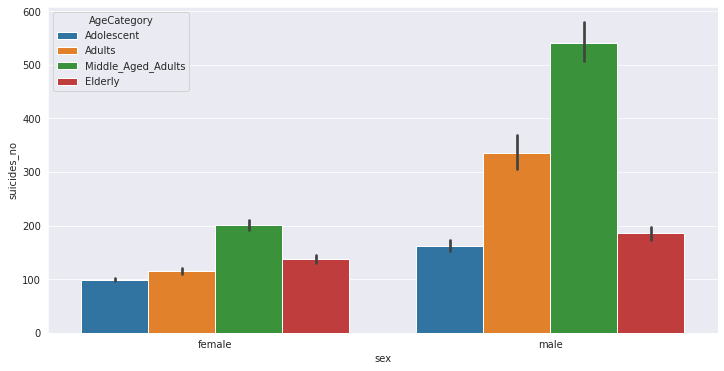

In [34]:
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'AgeCategory', data= suicide_raw_df);

From the graph, it's pretty clear that males tend to commit more suicided than females.Especially middle aged men are at the highest risk of commiting suicide.

Let us save and upload our work to Jovian before continuing

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'

## Asking and Answering Questions

Let's explore some different interesting questions that may arise from this dataset and try to answer the using pandas data frames  and graphs



#### Q1: Which Age group is more inclined towards suicide?

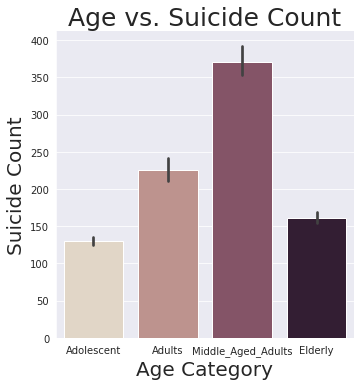

In [37]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=suicide_raw_df);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20);

From the data it's evident that Middle Aged Adults are at the highest risk of commiting suicide.

#### Q2: Which country has the most Suicides ? 

In [38]:
def find_minmax(x):
     
    min_index = suicide_raw_df[x].idxmin()
    
    high_index = suicide_raw_df[x].idxmax()
    
    high = pd.DataFrame(suicide_raw_df.loc[high_index,:])
    low = pd.DataFrame(suicide_raw_df.loc[min_index,:])
    
    
    print("Country Which Has Highest "+ x + " : ",suicide_raw_df['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",suicide_raw_df['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,35600.0,19044200.0
Age_num,75,35
AgeCategory,Elderly,Middle_Aged_Adults


#### Q3: Which country has the highest number of suicides compared to their population ?

In [39]:
suicide_raw_df['suicide_per_population'] = suicide_raw_df['suicides_no']/suicide_raw_df['population']

In [40]:
suicide_raw_df

,country,year,sex,age,suicides_no,population,Age_num,AgeCategory,suicide_per_population
0,Albania,1985,female,15-24 years,183.352865,2.779000e+05,15,Adolescent,0.000660
1,Albania,1985,female,25-34 years,183.352865,2.468000e+05,25,Adults,0.000743
2,Albania,1985,female,35-54 years,183.352865,2.675000e+05,35,Middle_Aged_Adults,0.000685
3,Albania,1985,female,5-14 years,183.352865,2.983000e+05,5,Adolescent,0.000615
4,Albania,1985,female,55-74 years,183.352865,1.387000e+05,55,Middle_Aged_Adults,0.001322
...,...,...,...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.000000,1.456536e+06,25,Adults,0.000103
43772,Zimbabwe,1990,male,35-54 years,132.000000,1.456536e+06,35,Middle_Aged_Adults,0.000091
43773,Zimbabwe,1990,male,5-14 years,6.000000,1.456536e+06,5,Adolescent,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.000000,1.456536e+06,55,Middle_Aged_Adults,0.000051


In [41]:
find_minmax('suicide_per_population')

Country Which Has Highest suicide_per_population :  Rodrigues
Country Which Has Lowest suicide_per_population  :  Egypt


,12993,32351
country,Egypt,Rodrigues
year,2005,2004
sex,male,male
age,5-14 years,75+ years
suicides_no,1.0,183.352865
population,9543088.0,259.0
Age_num,5,75
AgeCategory,Adolescent,Elderly
suicide_per_population,0.0,0.707926


#### Q4: What Gender is more inclined towards suicide ?

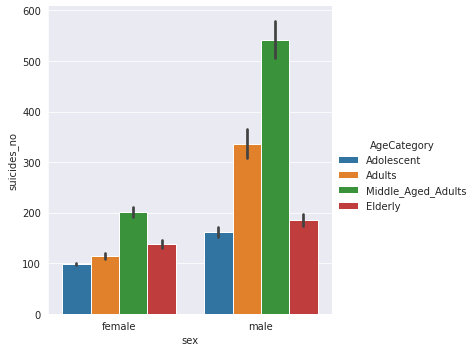

In [42]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=suicide_raw_df);

Middle aged men are more inclined towards suicides from the data.The difference between them is actually quite big.



#### Q5: What is the total number of suicides commited each year ?

In [43]:
print("Total cases from 1979-2016: \n",suicide_raw_df.groupby("year")['population'].sum())

Total cases from 1979-2016: 
 year
1979    1.001647e+09
1980    1.307487e+09
1981    1.432747e+09
1982    1.346368e+09
1983    1.438444e+09
1984    1.339990e+09
1985    1.544468e+09
1986    1.617279e+09
1987    1.682249e+09
1988    1.620326e+09
1989    1.634700e+09
1990    1.793699e+09
1991    1.807160e+09
1992    1.884134e+09
1993    1.781921e+09
1994    1.869774e+09
1995    1.872417e+09
1996    1.964516e+09
1997    2.016162e+09
1998    2.021550e+09
1999    2.054249e+09
2000    2.192496e+09
2001    2.168874e+09
2002    2.259466e+09
2003    2.242518e+09
2004    2.146033e+09
2005    2.129074e+09
2006    2.207021e+09
2007    2.173221e+09
2008    2.303459e+09
2009    2.456064e+09
2010    2.395311e+09
2011    2.327866e+09
2012    2.273812e+09
2013    2.398830e+09
2014    2.342313e+09
2015    2.071006e+09
2016    5.953533e+08
Name: population, dtype: float64


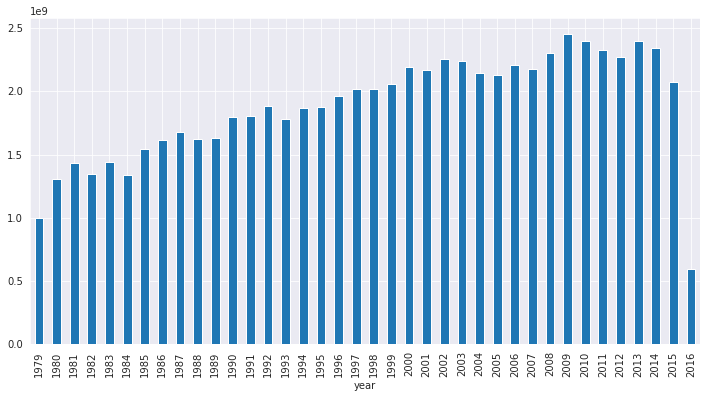

In [44]:
suicide_raw_df.groupby("year")["population"].sum().plot(kind="bar");

Let us save and upload our work to Jovian before continuing.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'

## Inferences and Conclusion

 1. There was a decline in the number of suicides commited in the 80's , this could be due to awareness of mental wellbeing and suicide. 



2. The data indicates that middle aged men are at the highest risk of commiting suicide. Adolescents and elderly have almost half the number of suicides compared to middle aged adults.


3. It is evident that males are more inclined towards suicide.There's a pretty big difference between the suicide count of males and females.

In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'

# Future Work
This Data Set can be used to analyse long time trends and differences between different countries across a few demographic groups.




# References
Check out the various resource used in this project:

* Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html
* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html
* Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
* Suicide-Rate-Data-Analysis dataset:  https://www.kaggle.com/datasets/szamil/who-suicide-statistics

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/suicide-rate-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/suicide-rate-data-analysis


'https://jovian.ai/jeetmia1/suicide-rate-data-analysis'